# 지역별 여가활동과 문화누리카드 가맹점 비교

In [ ]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
%cd C:\python

C:\python


### 문화누리카드 오프라인 가맹점 데이터

In [3]:
#문화누리카드 오프라인 가맹점 데이터

nuri_offline = pd.read_csv('99z/datas/한국문화예술위원회_문화누리카드 오프라인 가맹점 목록_20211222.csv',encoding='cp949')
nuri_offline

,지역,가맹점명,분류,주소
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가)
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
...,...,...,...,...
23479,전북,SM스포츠,체육용품,전북 전주시 완산구 거아평로 145
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"
23481,경기,포토엔젤,미술,경기 성남시 수정구 탄리로 120번길 1
23482,서울,동서울터미널,교통수단,서울 광진구 강변역로 50


In [4]:
nuri2 = nuri_offline.set_index('주소')
nuri2

,지역,가맹점명,분류
주소,,,
전북 전주시 완산구 경기전길 42 (경원동2가),전북,한옥마을 아트홀,공연
전북 전주시 완산구 경기전길 8-5,전북,경원장여관,숙박
전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가),전북,사단법인교동아트,미술
전라북도 전주시 완산구 동문길 106 홍지서림,전북,홍지서림 전주점,도서
전북 전주시 완산구 전주객사4길 24-17,전북,포토젠(사진관),미술
...,...,...,...
전북 전주시 완산구 거아평로 145,전북,SM스포츠,체육용품
"서울 은평구 연서로29길 7, 1층",서울,자연스튜디오,미술
경기 성남시 수정구 탄리로 120번길 1,경기,포토엔젤,미술


In [5]:
sampleNuri = random.sample(list(nuri_offline['주소']), 1000)
sampleNuri[0:3]

['대구 달서구 월성동 1269-3 ', '인천 남동구 구월말로 3번길 37 카우빌딩 102호 ', '경남 거제시 장평3로 75  ']

In [8]:
#[nuri_offline.주소 == sampleNuri]
#sampleNuri[sampleNuri.notnull().sum(axis=1) >=4]

In [9]:
len(nuri_offline)   #전체 자료수

23484

In [10]:
nuri_offline.info()  #결측치 존재 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23484 entries, 0 to 23483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      23484 non-null  object
 1   가맹점명    23484 non-null  object
 2   분류      23484 non-null  object
 3   주소      23484 non-null  object
dtypes: object(4)
memory usage: 734.0+ KB


In [11]:
#지역별 자료수
nuri_offline.지역.value_counts()

경기     4256
서울     3279
강원     1715
경북     1677
전북     1493
경남     1471
부산     1371
전남     1323
충남     1130
충북      948
광주      937
인천      914
대구      874
대전      751
제주      736
울산      470
세종      139
Name: 지역, dtype: int64

In [12]:
#분류별 자료수
nuri_offline.분류.value_counts()

미술       4069
숙박       3796
도서       3631
체육시설     2511
체육용품     2008
문화체험     1681
교통수단     1502
관광지      1391
여행사      1053
영상        658
공연        630
음악        503
스포츠관람      51
Name: 분류, dtype: int64

In [13]:
#지역 column 고유값 확인
nuri_offline['지역'].unique()

array(['전북 ', '제주 ', '전남 ', '부산 ', '충남 ', '광주 ', '대전 ', '대구 ', '충북 ',
       '울산 ', '경기 ', '서울 ', '인천 ', '경북 ', '강원 ', '세종 ', '경남 '],
      dtype=object)

In [14]:
#지역 이름 뒤에 띄어쓰기 제거
nuri_offline['지역'] = nuri_offline['지역'].str[:-1]

In [15]:
#분류 column 고유값 확인
nuri_offline["분류"].unique()

array(['공연', '숙박', '미술', '도서', '여행사', '교통수단', '문화체험', '관광지', '음악', '영상',
       '체육시설', '체육용품', '스포츠관람'], dtype=object)

### 1년동안 가장 많이 한 여가활동

In [16]:
#1년 동안 가장 많이 참여한 여가 활동 데이터 불러오기
culture = pd.read_csv('99z/datas/지난_1년_동안_가장_많이_참여한_여가활동__1순위__중분류_20230320002311.csv',encoding='cp949')
culture

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,통계분류(1),통계분류(2),표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,전체,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,성별,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,성별,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,17개 시도별,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,17개 시도별,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,17개 시도별,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,17개 시도별,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,17개 시도별,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,17개 시도별,대전,460,-,-,-,1.3,-,18.2,78.4,2.1


In [17]:
culture.columns

Index(['통계분류(1)', '통계분류(2)', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8'],
      dtype='object')

In [18]:
del culture["통계분류(1)"]

In [19]:
culture.head()

,통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,통계분류(2),표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9


In [20]:
#column명 변경
culture.columns=['분류', '표본수', '문화예술관람활동', '문화예술참여활동', '스포츠관람활동','스포츠참여활동', '관광활동', '취미오락활동', '휴식활동', '사회및 기타활동']

In [21]:
#첫 행 제거
culture=culture.loc[1:,:]
culture

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,대전,460,-,-,-,1.3,-,18.2,78.4,2.1
10,울산,390,-,-,1,2.6,0.1,15.7,61.6,18.9


### 가맹점 분류를 여가활동 카테고리로 수정
- 미술 columm에서 사진,표구 데이터 분리

    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

#### 미술 분류 중에서 사진,표구 분류

In [22]:
#분류 기준 단어
cat_photo = ["스튜디오", "사진", "포토", "photo"] 
cat_pen = ['문구','표구']

In [23]:
#기준 단어를 포함하는 사진 데이터 확인
art = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_photo]
art

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480     True
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4         True
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4         True
          ...  
 23479    False
 23480    False
 23481     True
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool]

In [24]:
##기준 단어를 포함하는 표구 데이터 확인
pen = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_pen]
pen

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool]

In [25]:
#하나라도 True이면 True
art_bool = art[0]
for a in art:
    art_bool = art_bool|a  

In [26]:
#하나라도 True이면 True
pen_bool = pen[0]
for p in pen:
    pen_bool = pen_bool|p  

In [27]:
art_bool

0        False
1        False
2        False
3        False
4         True
         ...  
23479    False
23480     True
23481     True
23482    False
23483    False
Name: 가맹점명, Length: 23484, dtype: bool

In [28]:
pen_bool

0        False
1        False
2        False
3        False
4        False
         ...  
23479    False
23480    False
23481    False
23482    False
23483    False
Name: 가맹점명, Length: 23484, dtype: bool

In [29]:
#사진 데이터 bool인덱싱 
photo_result = nuri_offline[art_bool][nuri_offline[art_bool]['분류']=='미술']
photo_result

,지역,가맹점명,분류,주소
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
10,전남,허바허바사진관,미술,전남 여수시 동문로 46
12,전남,금화스튜디오,미술,전남 여수시 충민로 280-1
15,전남,대한칼라스튜디오,미술,전남 여수시 중앙로 38
18,전남,에덴스튜디오,미술,전남 여수시 신월로 675-1
...,...,...,...,...
23436,경남,KIM스튜디오,미술,경남 창원시 성산구 원이대로 652 롯데빌딩 2층 202호
23446,서울,청사진관,미술,서울 양천구 중앙로 253 남도빌딩 6층
23454,전북,갤러리S/T현상소(사진관),미술,전라북도 군산시 황룡2길 8 갤러리현상소
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"


In [30]:
#표구 데이터 bool 인덱싱
pen_result = nuri_offline[pen_bool][nuri_offline[pen_bool]['분류']=='미술']
pen_result

,지역,가맹점명,분류,주소
11,전남,동양표구사,미술,전라남도 여수시 하멜로 12
127,충남,둘레표구사,미술,충남 논산시 강경읍 남교리81
165,부산,복인당 화랑 표구사,미술,부산 기장군 장안읍 좌천리 249-1 복인당표구사
303,광주,진도표구사,미술,광주 동구 문화전당로 14 (남동)
660,대구,대구화방문구,미술,대구광역시 남구 명덕로36길 32
...,...,...,...,...
23112,서울,문구포유 노원지점,미술,서울특별시 노원구 상계로3길 15 현우빌딩 지층
23117,강원,우리문구완구,미술,강원도 인제군 북면 원통로 182
23127,경기,학생화방문구센터,미술,경기도 부천시 부천로24번길 3
23140,서울,스카이문구,미술,서울특별시 성북구 성북로4길 52 한신한진아파트 스카이프라자 동광 547호


In [31]:
#분류 이름 사진,표구로 변경
nuri_offline.loc[photo_result.index, "분류"] = "사진"
nuri_offline.loc[pen_result.index, "분류"] = "표구"

In [32]:
#분류가 사진인 데이터 확인
nuri_offline[nuri_offline["분류"]=="사진"]

,지역,가맹점명,분류,주소
4,전북,포토젠(사진관),사진,전북 전주시 완산구 전주객사4길 24-17
10,전남,허바허바사진관,사진,전남 여수시 동문로 46
12,전남,금화스튜디오,사진,전남 여수시 충민로 280-1
15,전남,대한칼라스튜디오,사진,전남 여수시 중앙로 38
18,전남,에덴스튜디오,사진,전남 여수시 신월로 675-1
...,...,...,...,...
23436,경남,KIM스튜디오,사진,경남 창원시 성산구 원이대로 652 롯데빌딩 2층 202호
23446,서울,청사진관,사진,서울 양천구 중앙로 253 남도빌딩 6층
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층"


In [33]:
#분류가 표구인 데이터 확인
nuri_offline[nuri_offline["분류"]=="표구"]

,지역,가맹점명,분류,주소
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12
127,충남,둘레표구사,표구,충남 논산시 강경읍 남교리81
165,부산,복인당 화랑 표구사,표구,부산 기장군 장안읍 좌천리 249-1 복인당표구사
303,광주,진도표구사,표구,광주 동구 문화전당로 14 (남동)
660,대구,대구화방문구,표구,대구광역시 남구 명덕로36길 32
...,...,...,...,...
23112,서울,문구포유 노원지점,표구,서울특별시 노원구 상계로3길 15 현우빌딩 지층
23117,강원,우리문구완구,표구,강원도 인제군 북면 원통로 182
23127,경기,학생화방문구센터,표구,경기도 부천시 부천로24번길 3
23140,서울,스카이문구,표구,서울특별시 성북구 성북로4길 52 한신한진아파트 스카이프라자 동광 547호


In [135]:
nuri_offline.분류.unique()

array(['공연', '숙박', '미술', '도서', '여행사', '교통수단', '문화체험', '관광지', '음악', '영상',
       '체육시설', '체육용품', '스포츠관람'], dtype=object)

#### 카테고리 분류
    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

In [35]:
#분류 기준 단어
c_w = ["영상","공연","미술"] 
c_j = ['문화체험','표구']
sp_w = ['스포츠관람']
sp_j = ['체육용품','체육시설']
tr = ['관광지','여행사','교통수단','숙박']
rest = ['음악']
hob = ['도서','사진']

In [36]:
#문화예술관람 카테고리 분류
cul_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_w ]

#하나라도 True이면 True
cul_w_bool = cul_w[0]
for c in cul_w:
    cul_w_bool = cul_w_bool|c  
    
df_cul_w = nuri_offline[cul_w_bool]
df_cul_w['국민여가'] = ['문화예술관람' for i in range(2746)]
df_cul_w
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\2019311769.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cul_w['국민여가'] = ['문화예술관람' for i in range(2746)]


,지역,가맹점명,분류,주소,국민여가
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가),문화예술관람
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가),문화예술관람
5,제주,제주스카이워터쇼,공연,제주 제주시 구좌읍 번영로 2172-80,문화예술관람
39,전북,서신갤러리,미술,전라북도 전주시 완산구 서신로 38 새터빌딩 지하 1층 서신갤러리,문화예술관람
51,전북,수지미술관,미술,"전라북도 남원시 수지면 물머리로 525 비둘기학교 ,수지미술관",문화예술관람
...,...,...,...,...,...
23428,전북,담소예술교육문화원,미술,전라북도 고창군 고창읍 모양성로 96 (유)신흥운수 1층,문화예술관람
23460,서울,수민예,미술,서울특별시 종로구 인사동길 34-1 인사아트플라자 1층 126호,문화예술관람
23461,서울,(주)댄스아트라인(공연),공연,서울 성북구 동소문로23길 8-12 지안빌딩 5층,문화예술관람
23476,전남,개명선물의집,미술,전라남도 완도군 금일읍 금일로 400,문화예술관람


In [37]:
cul_w_bool.sum()

2746

In [38]:
#문화예술참여 카테고리 분류
cul_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_j ]

#하나라도 True이면 True
cul_j_bool = cul_j[0]
for c in cul_j:
    cul_j_bool = cul_j_bool|c  
    
df_cul_j = nuri_offline[cul_j_bool]
df_cul_j['국민여가'] = ['문화예술참여' for i in range(1904)]
df_cul_j
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\3423375682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cul_j['국민여가'] = ['문화예술참여' for i in range(1904)]


,지역,가맹점명,분류,주소,국민여가
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12,문화예술참여
28,전북,흙마을도예,문화체험,전라북도 남원시 주천면 원천로 420-5,문화예술참여
41,전북,고운한지공예,문화체험,전라북도 전주시 완산구 서학1길 38-3,문화예술참여
76,전남,올리브그린,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 올리브그린,문화예술참여
77,전남,아트앤샵수,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 아트앤샵수,문화예술참여
...,...,...,...,...,...
23462,전북,네이처휴(수공예),문화체험,"전북 전주시 완산구 현무1길20, 1층 3호",문화예술참여
23463,경북,명주이야기,문화체험,경상북도 상주시 함창읍 무운로 1633,문화예술참여
23468,경기,심곡3동 주민센터,문화체험,"경기 부천시 부일로 393, 1층(심곡동)",문화예술참여
23472,경북,바비샵 엔 공방,문화체험,경상북도 청송군 청송읍 금월로 274,문화예술참여


In [39]:
nuri_offline[cul_j_bool]

,지역,가맹점명,분류,주소
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12
28,전북,흙마을도예,문화체험,전라북도 남원시 주천면 원천로 420-5
41,전북,고운한지공예,문화체험,전라북도 전주시 완산구 서학1길 38-3
76,전남,올리브그린,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 올리브그린
77,전남,아트앤샵수,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 아트앤샵수
...,...,...,...,...
23462,전북,네이처휴(수공예),문화체험,"전북 전주시 완산구 현무1길20, 1층 3호"
23463,경북,명주이야기,문화체험,경상북도 상주시 함창읍 무운로 1633
23468,경기,심곡3동 주민센터,문화체험,"경기 부천시 부일로 393, 1층(심곡동)"
23472,경북,바비샵 엔 공방,문화체험,경상북도 청송군 청송읍 금월로 274


In [40]:
cul_j_bool.sum()

1904

In [41]:
#스포츠관람 카테고리 분류
sports_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_w ]

#하나라도 True이면 True
sports_w_bool = sports_w[0]
for c in sports_w:
    sports_w_bool = sports_w_bool|c  
    
df_sports_w = nuri_offline[sports_w_bool]
df_sports_w['국민여가'] = ['스포츠관람' for i in range(51)]
df_sports_w
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\1432300457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports_w['국민여가'] = ['스포츠관람' for i in range(51)]


,지역,가맹점명,분류,주소,국민여가
11635,인천,인천 Utd(인천축구전용경기장),스포츠관람,인천광역시 중구 참외전로 246,스포츠관람
11746,경기,러시앤캐시 베스피드 (안산상록수체육관),스포츠관람,경기 안산시 상록구 용신로 422 (본오동),스포츠관람
13696,광주,광주FC (광주시민 프로 축구단),스포츠관람,광주 서구 금화로 240 월드컵경기장 (풍암동),스포츠관람
14041,서울,웨슬리퀘스트 의정부 KB손해보험 스타즈(의정부실내체육관),스포츠관람,경기도 의정부시 체육로 90 의정부실내체육관,스포츠관람
14042,서울,웨슬리퀘스트 서울 우리카드 위비(서울장충체육관),스포츠관람,서울특별시 중구 동호로 241 장충체육관,스포츠관람
14114,경기,웨슬리퀘스트 IBK기업은행 알토스(화성종합경기타운),스포츠관람,경기도 화성시 향남읍 향남로 470 화성종합경기타운 화성종합경기타운 매표소,스포츠관람
14291,서울,웨슬리퀘스트 인천 흥국생명핑크스파이더스(인천계양체육관),스포츠관람,인천광역시 계양구 봉오대로 855 서운체육공원,스포츠관람
14300,서울,웨슬리퀘스트 안산 OK저축은행 러쉬앤케시(안산상록수체육관),스포츠관람,경기도 안산시 상록구 용신로 422 상록수체육관,스포츠관람
14397,경기,웨슬리퀘스트 수원 한국전력빅스톰(수원실내체육관),스포츠관람,경기도 수원시 권선구 서수원로577번길 171,스포츠관람
14398,강원,강원FC(강릉 종합운동장),스포츠관람,강원도 강릉시 종합운동장길 69 강릉종합운동장,스포츠관람


In [42]:
sports_w_bool.sum()

51

In [43]:
#스포츠참여 카테고리 분류
sports_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_j ]

#하나라도 True이면 True
sports_j_bool = sports_j[0]
for c in sports_j:
    sports_j_bool = sports_j_bool|c  
    
df_sports_j = nuri_offline[sports_j_bool]
df_sports_j['국민여가'] = ['스포츠참여' for i in range(4519)]
df_sports_j
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\1901272917.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports_j['국민여가'] = ['스포츠참여' for i in range(4519)]


,지역,가맹점명,분류,주소,국민여가
661,대구,대구사격장(대구시설공단),체육시설,대구 북구 문주길 170,스포츠참여
824,경기,의정부 스포츠센터,체육시설,"경기 의정부시 장곡로 101, 의정부스포츠센터",스포츠참여
825,경기,의정부시설관리공단(빙상장),체육시설,경기 의정부시 체육로136,스포츠참여
829,인천,삼천리자전거 원당점,체육용품,인천광역시 서구 고산후로 97 희성프라자,스포츠참여
830,인천,삼천리자전거검단점,체육용품,인천광역시 서구 완정로 11 진수빌딩 1층,스포츠참여
...,...,...,...,...,...
23459,경기,플라잉요가 MJ studio,체육시설,경기도 시흥시 복지로 90 CGV 5층 502호,스포츠참여
23474,경북,익스트리영천점,체육용품,경북 영천시 호국로 28-1,스포츠참여
23475,전북,호남스포츠,체육용품,전북 전주시 완산구 전주객사5길 73-7,스포츠참여
23477,경북,구봉레저스포츠,체육용품,경북 의성군 의성읍 중리리 713-28,스포츠참여


In [44]:
sports_j_bool.sum()

4519

In [45]:
#관광활동 카테고리 분류
travel= [nuri_offline["분류"].str.lower().str.contains(word) for word in tr ]

#하나라도 True이면 True
travel_bool = travel[0]
for c in travel:
    travel_bool = travel_bool|c  
    
df_travel = nuri_offline[travel_bool]
df_travel['국민여가'] = ['관광활동' for i in range(7742)]
df_travel
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\3182775825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_travel['국민여가'] = ['관광활동' for i in range(7742)]


,지역,가맹점명,분류,주소,국민여가
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5,관광활동
6,제주,패밀리하우스,숙박,제주 제주시 구좌읍 상도로 3,관광활동
7,제주,와락게스트하우스,숙박,제주 제주시 구좌읍 세평항로 45-4,관광활동
8,제주,담너머그곳에,숙박,제주 제주시 구좌읍 하도3길 108,관광활동
9,전남,리츠모텔,숙박,전남 여수시 거북선공원1길 8 (학동),관광활동
...,...,...,...,...,...
23467,제주,화조원,관광지,제주시 애월읍 애원로 804,관광활동
23469,경기,엘가관광호텔,숙박,경기 화성시 향남읍 평6길 46-1,관광활동
23471,제주,제주로렌트카,교통수단,제주시 오일장중길 128,관광활동
23478,경기,아침풍경팬션,숙박,경기 가평군 상면 임초리 370-2,관광활동


In [46]:
travel_bool.sum()

7742

In [47]:
#휴식활동 카테고리 분류
rest_cat= [nuri_offline["분류"].str.lower().str.contains(word) for word in rest ]

#하나라도 True이면 True
rest_bool = rest_cat[0]
for c in rest_cat:
    rest_bool = rest_bool|c  
    
df_rest = nuri_offline[rest_bool]
    

In [48]:
df_rest['국민여가']=['휴식활동' for i in range(503)]      
df_rest

C:\Users\user\AppData\Local\Temp\ipykernel_11760\470482696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest['국민여가']=['휴식활동' for i in range(503)]


,지역,가맹점명,분류,주소,국민여가
74,전남,세광음악사,음악,전남 순천시 해룡면 조례못등길 94,휴식활동
75,전남,세광레코드,음악,전남 순천시 해룡면 상삼리640-6,휴식활동
107,전북,명성악기사,음악,전북 전주시 완산구 다가동3가81-1,휴식활동
175,부산,팬레코드,음악,부산 남구 대연5동 329-18번지 1층,휴식활동
292,광주,광주선경미디어상사,음악,광주 동구 금남로5가1-5 전자랜드 119호,휴식활동
...,...,...,...,...,...
23397,경남,베를린기타전문학원,음악,경상남도 창원시 성산구 창이대로881번길 11 신대방빌딩 402호,휴식활동
23400,부산,비틀즈레코드,음악,부산 북구 백양대로 1196,휴식활동
23412,서울,서울레코드,음악,서울 종로구 종로154 (종로3가),휴식활동
23437,경북,대전소리사,음악,경북 경주시 황오동 215-9,휴식활동


In [49]:
rest_bool.sum()

503

In [50]:
#취미오락 카테고리 분류
hobby= [nuri_offline["분류"].str.lower().str.contains(word) for word in hob ]

#하나라도 True이면 True
hobby_bool = hobby[0]
for c in hobby:
    hobby_bool = hobby_bool|c  
    
df_hobby = nuri_offline[hobby_bool]
df_hobby['국민여가'] = ['취미오락' for i in range(6019)]
df_hobby
    

C:\Users\user\AppData\Local\Temp\ipykernel_11760\1340337137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hobby['국민여가'] = ['취미오락' for i in range(6019)]


,지역,가맹점명,분류,주소,국민여가
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림,취미오락
4,전북,포토젠(사진관),사진,전북 전주시 완산구 전주객사4길 24-17,취미오락
10,전남,허바허바사진관,사진,전남 여수시 동문로 46,취미오락
12,전남,금화스튜디오,사진,전남 여수시 충민로 280-1,취미오락
15,전남,대한칼라스튜디오,사진,전남 여수시 중앙로 38,취미오락
...,...,...,...,...,...
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소,취미오락
23464,경북,무한대서적,도서,경상북도 포항시 북구 장량로 183,취미오락
23465,경기,행복한서적(로데오점),도서,"경기 시흥시 중심상가3길 12, 지하층102호(정왕동)",취미오락
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층",취미오락


In [51]:
len(df_hobby)

6019

In [52]:
#데이터 프레임 합치기
result_df = pd.concat([df_cul_w,df_cul_j,df_sports_w,df_sports_j,df_travel,df_rest,df_hobby])
result_df.국민여가.unique()

array(['문화예술관람', '문화예술참여', '스포츠관람', '스포츠참여', '관광활동', '휴식활동', '취미오락'],
      dtype=object)

##### 국민여가 column 추가된 데이터프레임

In [53]:
result_df

,지역,가맹점명,분류,주소,국민여가
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가),문화예술관람
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가),문화예술관람
5,제주,제주스카이워터쇼,공연,제주 제주시 구좌읍 번영로 2172-80,문화예술관람
39,전북,서신갤러리,미술,전라북도 전주시 완산구 서신로 38 새터빌딩 지하 1층 서신갤러리,문화예술관람
51,전북,수지미술관,미술,"전라북도 남원시 수지면 물머리로 525 비둘기학교 ,수지미술관",문화예술관람
...,...,...,...,...,...
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소,취미오락
23464,경북,무한대서적,도서,경상북도 포항시 북구 장량로 183,취미오락
23465,경기,행복한서적(로데오점),도서,"경기 시흥시 중심상가3길 12, 지하층102호(정왕동)",취미오락
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층",취미오락


## 지역별 가맹점 비율 시각화

In [108]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

D2Coding
D2Coding
D2Coding
MS Gothic
HYSinMyeongJo-Medium
NeoDunggeunmo Pro


In [86]:
global_font = {'family':'D2Coding','size' : 12 , 'weight':'bold'}

#폰트 설정
mpl.rc('font',**global_font)

#유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus=False)

#주피터 내부에 그림 표시 (magic명령)
%matplotlib inline

In [87]:
#폰트 설정
mpl.rcParams['font.family'] = 'D2Coding'
print(mpl.rcParams['font.family'])

['D2Coding']


In [67]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

In [68]:
#그래프 배경 설정
import seaborn as sns
sns.set_theme(style='whitegrid')

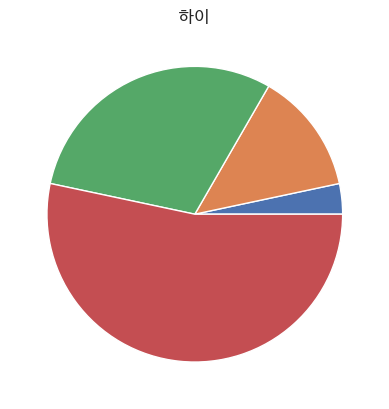

In [89]:
plt.pie([1,4,9,16])
plt.title('하이')
plt.show()

### 분야별 가맹점 비율 그래프(각각)

In [ ]:
for cat in nuri_offline["분류"].unique():
    data = nuri_offline[nuri_offline["분류"] == cat]["지역"].value_counts(True)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{cat} 분야의 지역별 가맹점 비율')
    sns.barplot(x=data.index,y=data.values)

### 국민여가별 가맹점 비율 그래프(각각)

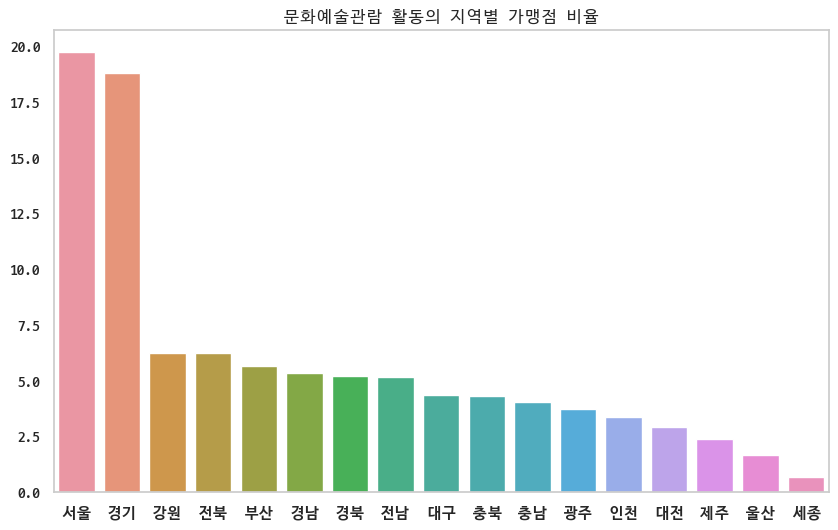

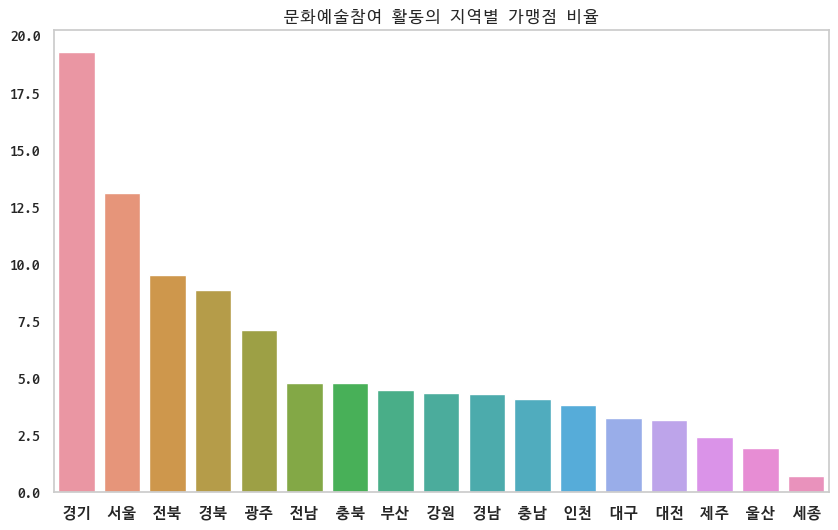

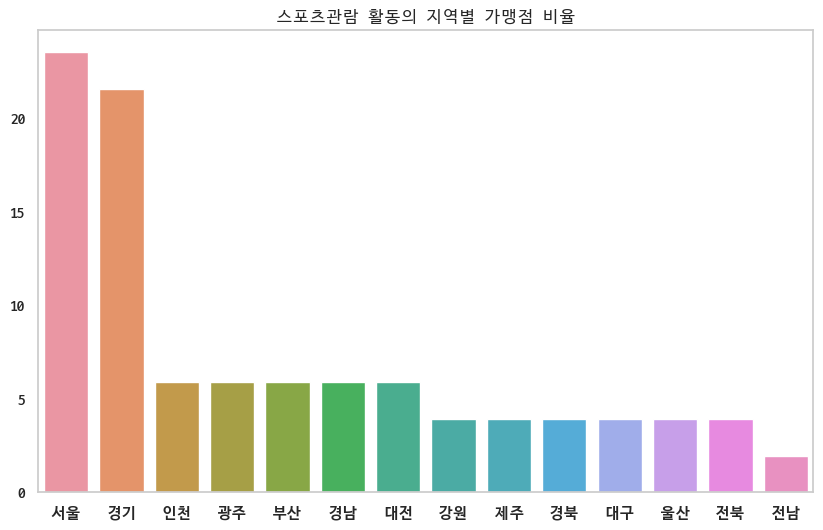

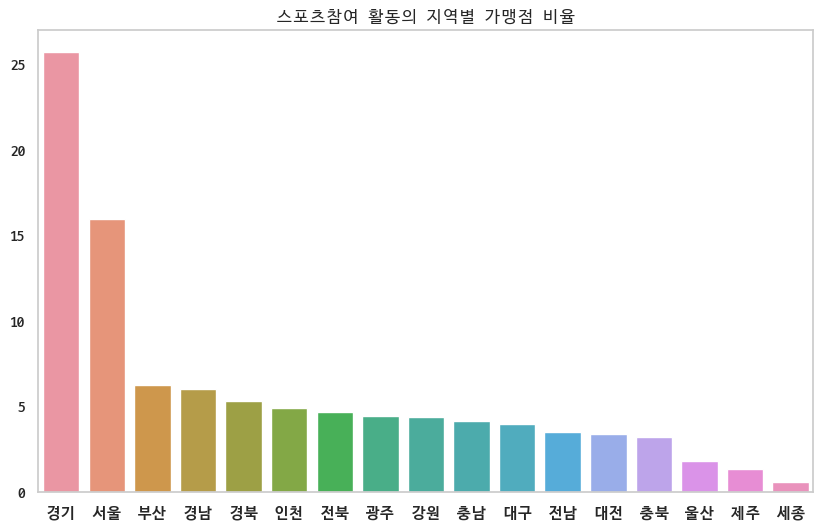

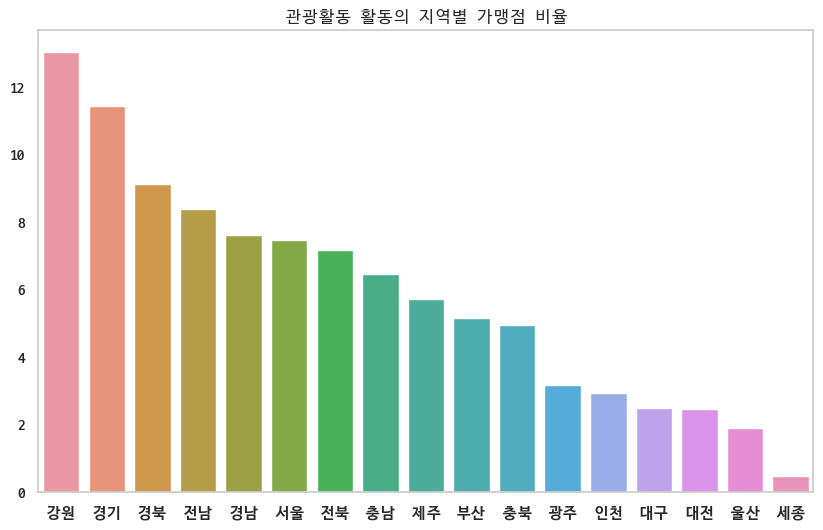

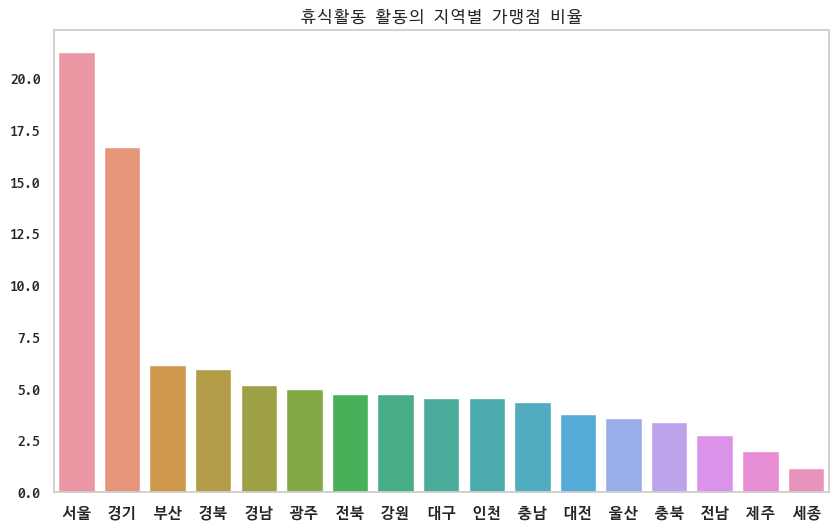

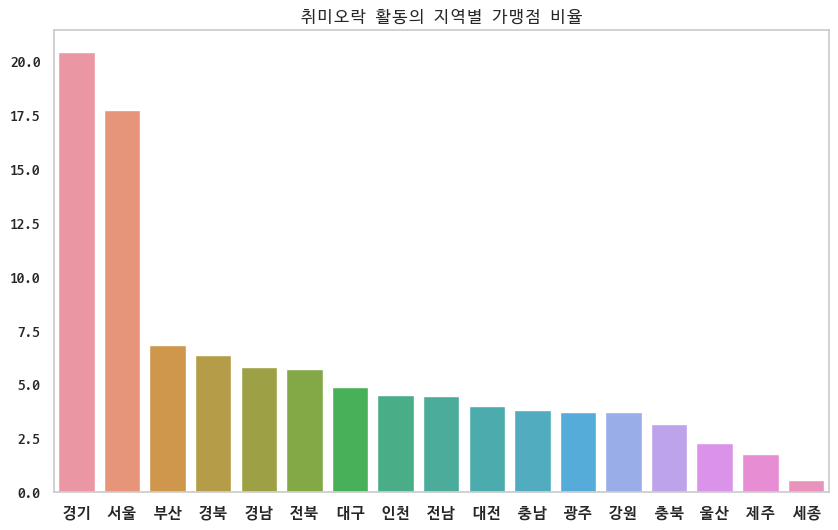

In [134]:
for cat in result_df["국민여가"].unique():
    data = result_df[result_df["국민여가"] == cat]["지역"].value_counts(True) * 100
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{cat} 활동의 지역별 가맹점 비율')
    sns.barplot(x=data.index,y=data.values)

### 지역별 가맹점 비율 그래프(각각)

In [ ]:
data.index

In [ ]:
for geo in result_df["지역"].unique():
    data = result_df[result_df["지역"] == geo]["국민여가"].value_counts(True) * 100
    
    colors = {"관광활동":'lightsalmon','취미오락':'khaki', '스포츠참여':'lightpink', 
              '문화예술참여':'darkseagreen', '문화예술관람':'skyblue', '휴식활동':'plum', '스포츠관람':'mediumvioletred'}
    
    plt.figure(figsize=(12, 12))
    plt.title(f'{geo} 지역별 가맹점 비율', fontsize = 20)
    plt.bar(x=data.index,height=data.values,color=[colors[c] for c in data.index])
    
    plt.show()

In [ ]:
data_total =culture.iloc[0,2:].sort_values(ascending=False)
data_total

In [ ]:
plt.style.available

In [ ]:
explode = [ 0.01 for _ in range(8)]
colors 
plt.figure(figsize=(13, 10))
plt.pie(data_total.values, labels=data_total.index,explode=explode,autopct='%1.1f%%')
plt.title('지난 1년 동안 가장 많이 한 여가활동',fontsize=20)
plt.legend()
plt.axis('equal')
plt.style.use('seaborn-bright')
plt.show()

### 누적 그래프

In [ ]:
#지역별로 분류 비율 추가하기
result= []
for cat in nuri_offline["지역"].unique():
    data = nuri_offline[nuri_offline["지역"] == cat]["분류"].value_counts(True).to_frame() *100
    data["지역"] = cat
    result.append(data)   

In [ ]:
final = pd.concat(result).reset_index()

In [ ]:
final

In [ ]:
#column명 재설정
final.columns = ["분류", "비율", "지역"]

In [ ]:
#지역별 분류 비율 포함한 데이터프레임 
final

In [ ]:
#비율의 총합이 100인지 확인
final.groupby(by="지역").sum()

In [ ]:
#분류별 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="분류", x="비율", hue="지역", dodge=False)

In [ ]:
#지역별 분류 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="지역", x="비율", hue="분류", dodge=False)

### 스캐터 플롯

In [ ]:
culture2 = culture.set_index('분류')

In [ ]:
culture.columns

In [ ]:
culture2

In [ ]:
culture3 = culture.iloc[3:]

In [ ]:
culture3 = culture3.set_index('분류')

In [ ]:
culture3.replace('-', 0, inplace=True)
del culture3['표본수']

In [ ]:
for i in culture3.index:
    plt.pie(culture3.loc[i].values,
            labels = culture3.loc[i].index,
            explode=[ 0.01 for _ in range(len(culture3.index))],
            autopct='%1.1f%%')
    plt.title(f'{i}에서의 여가 활동별',fontsize=20)
    plt.axis('equal')
    plt.style.use('seaborn-bright')
    plt.figure(figsize=(13, 10))
    plt.show()

In [ ]:
text

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

nuri_offline = pd.read_csv('99z/datas/한국문화예술위원회_문화누리카드 오프라인 가맹점 목록_20211222.csv',encoding='cp949')

wordcloud_df = nuri_offline['가맹점명']
text = ' '.join(wordcloud_df)
text = text.replace('(주)','').replace('(유)','')

wc = WordCloud(font_path='\fonts\D2Coding.TTF',
               max_font_size=60,
               #width=800, height=400,
               #background_color = 'lightgrey',
               ).generate(text)

plt.figure(figsize=(16,8))

#x, y축 생략
plt.axis('off')

#grid lines 생략
plt.grid(False)

plt.imshow(wc, interpolation='bilinear')
plt.show()

OSError: cannot open resource

In [81]:
%pwd

'C:\\python'

In [120]:
wordcloud_df

0                   한옥마을 아트홀
1                      경원장여관
2                   사단법인교동아트
3                   홍지서림 전주점
4                   포토젠(사진관)
                ...         
23479                  SM스포츠
23480                 자연스튜디오
23481                   포토엔젤
23482                 동서울터미널
23483    김해서부문화센터((재)김해문화재단)
Name: 가맹점명, Length: 23484, dtype: object

In [ ]:
text.replace('(주)','').replace('(유)','')

In [ ]:
!pip install wordcloud